Data loaded from ../data/raw/diabetes_binary_health_indicators_BRFSS2015.csv. Shape: (253680, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


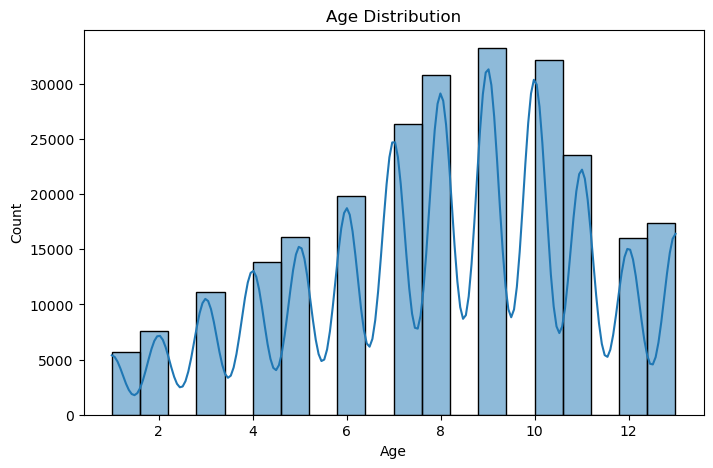

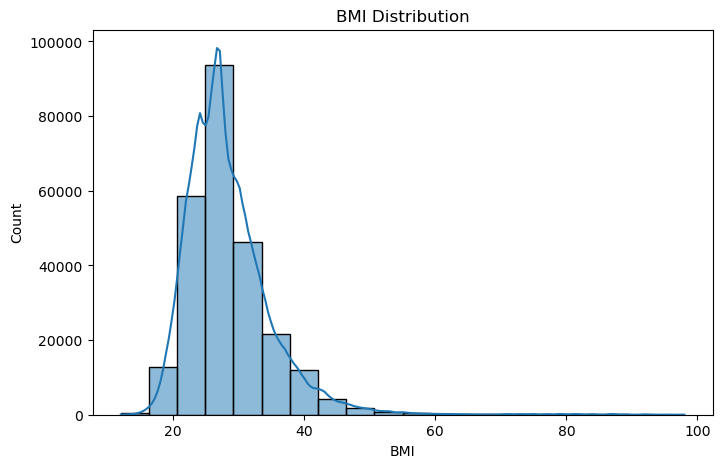

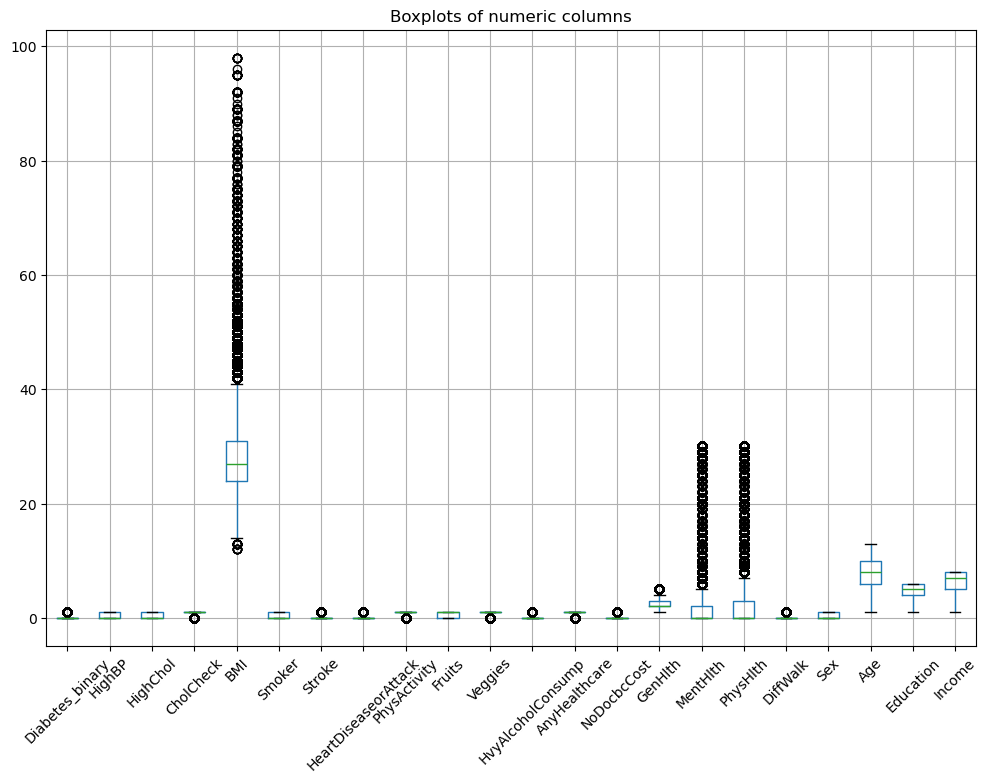

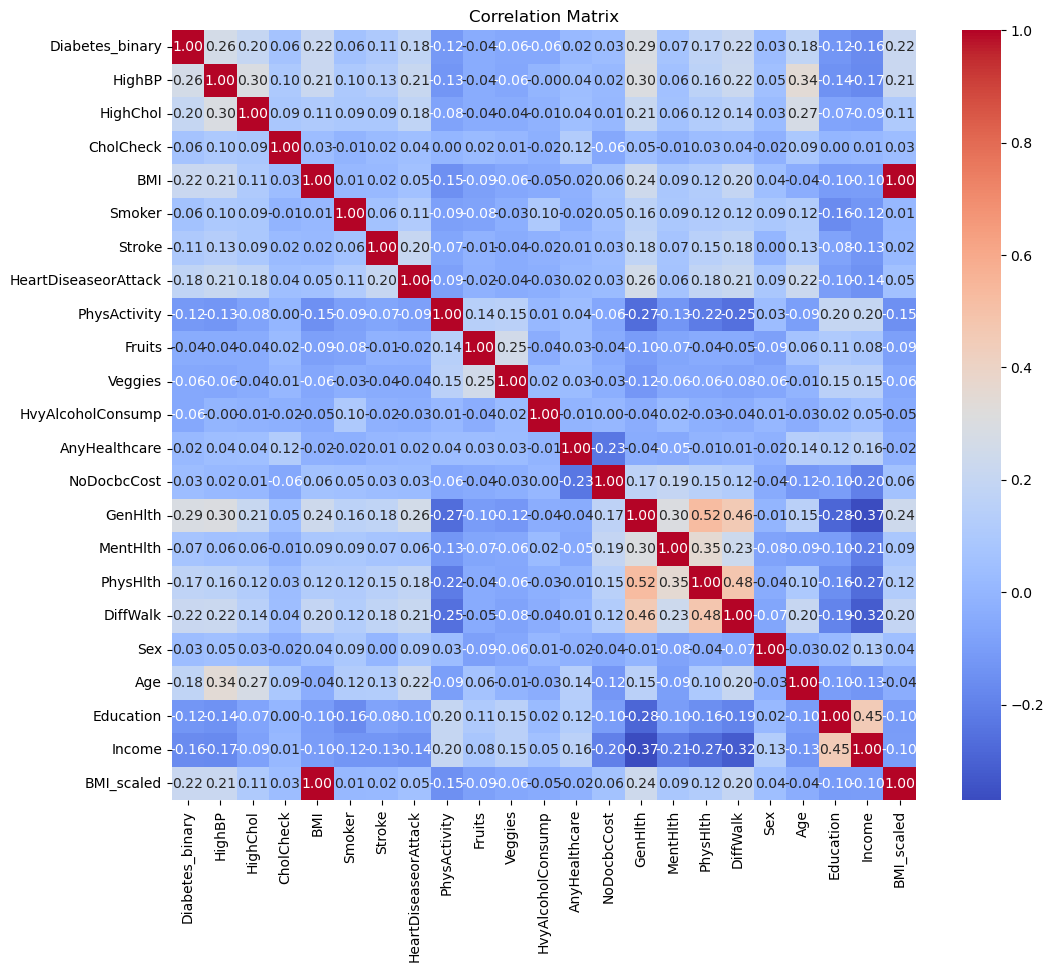

/var/folders/51/b88m_0s92sgbb_58mhvtn7k00000gn/T/ipykernel_2921/1498316233.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


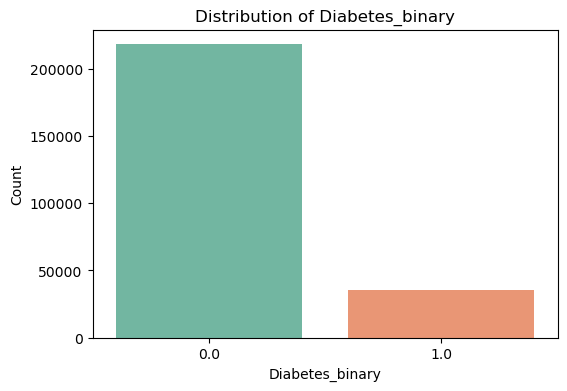

Diabetes dataset cleaned & saved to ../data/processed/cdc_diabetes_clean.csv
Data loaded from ../data/raw/heart_disease.csv. Shape: (4240, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0



Removed 97 outliers from BMI


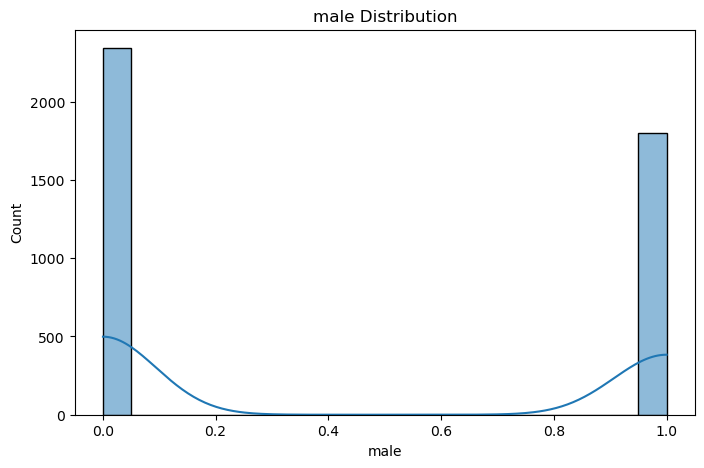

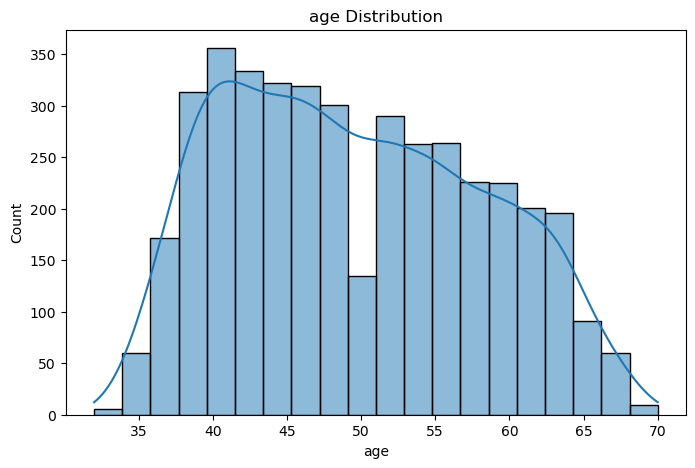

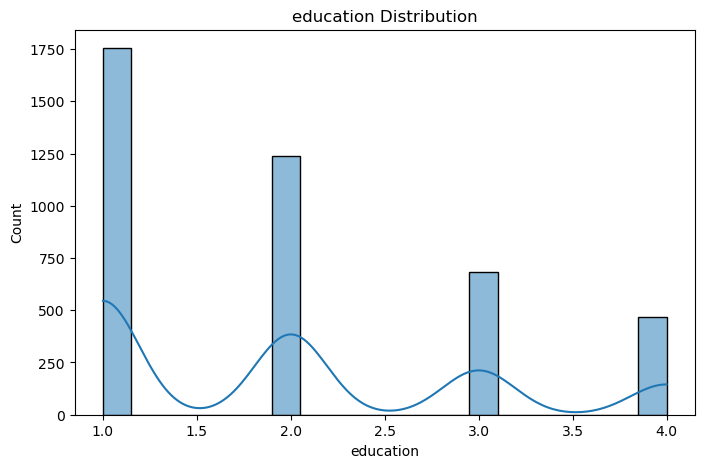

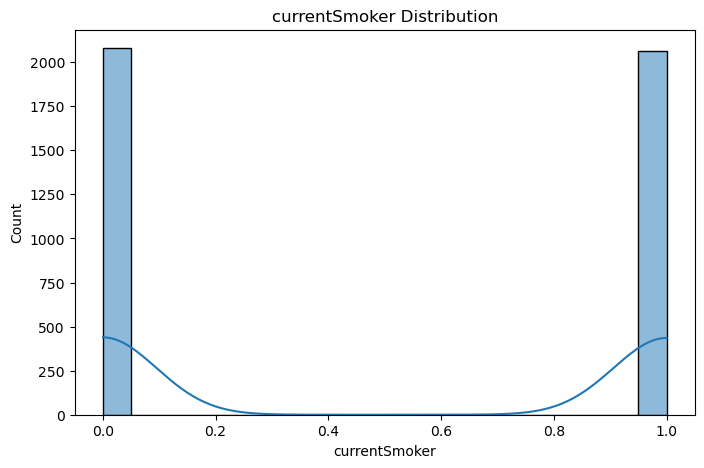

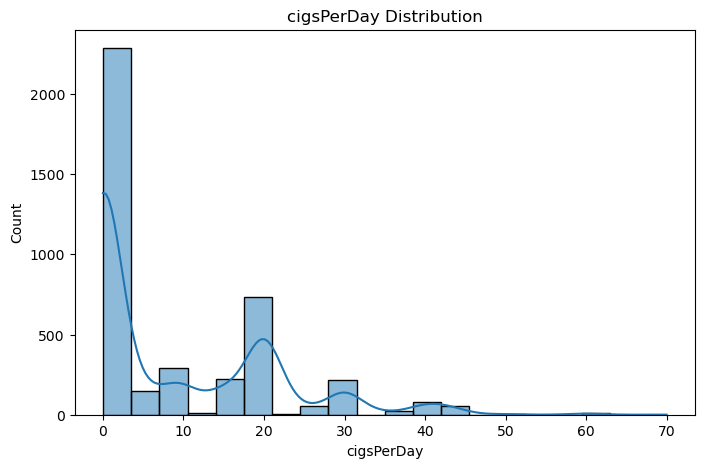

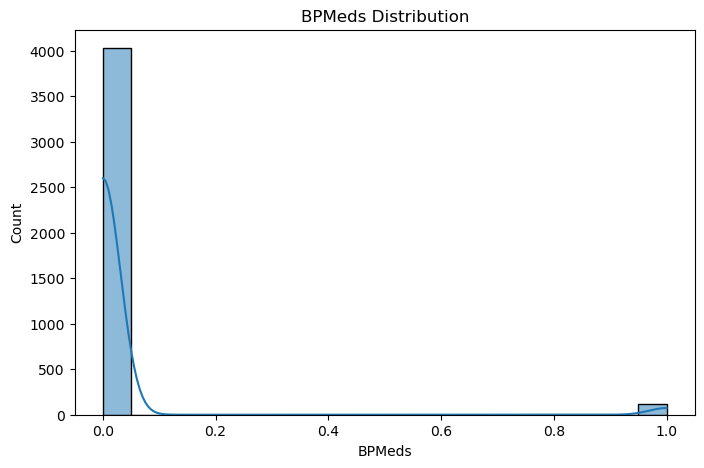

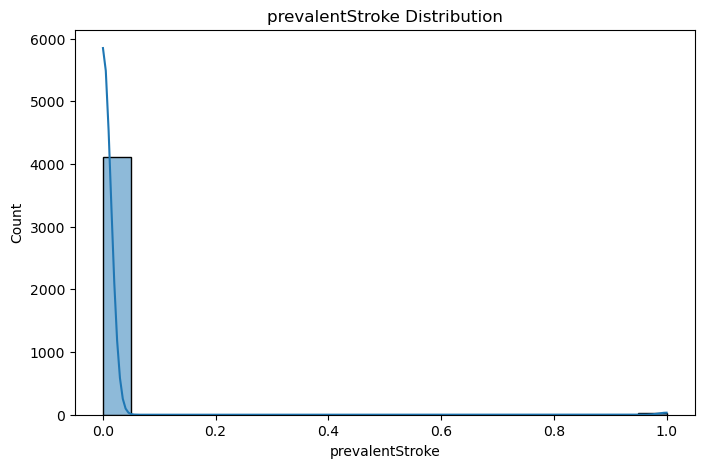

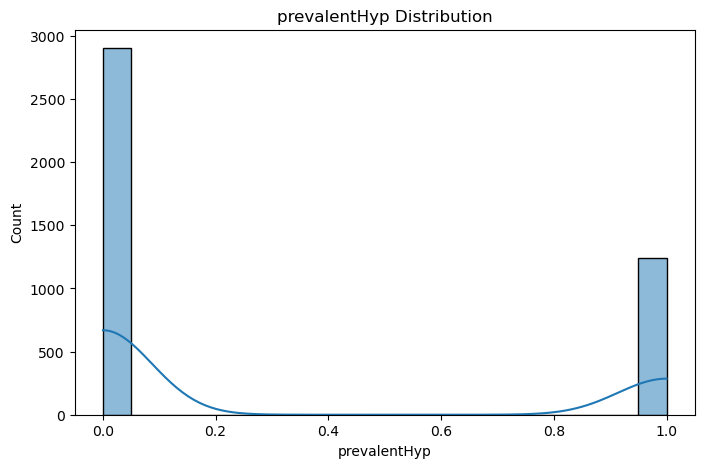

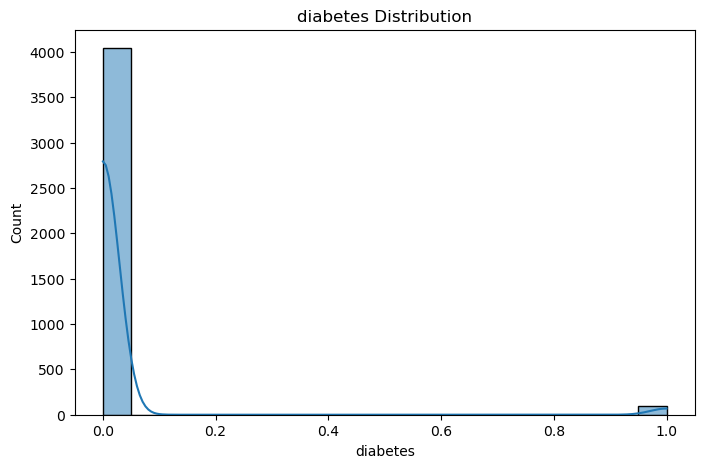

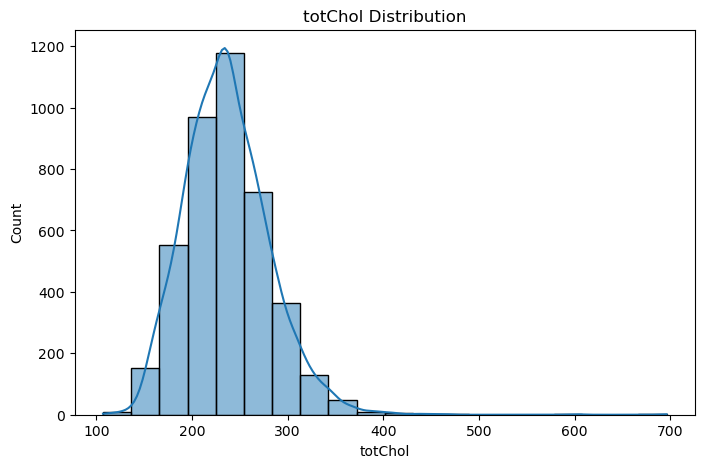

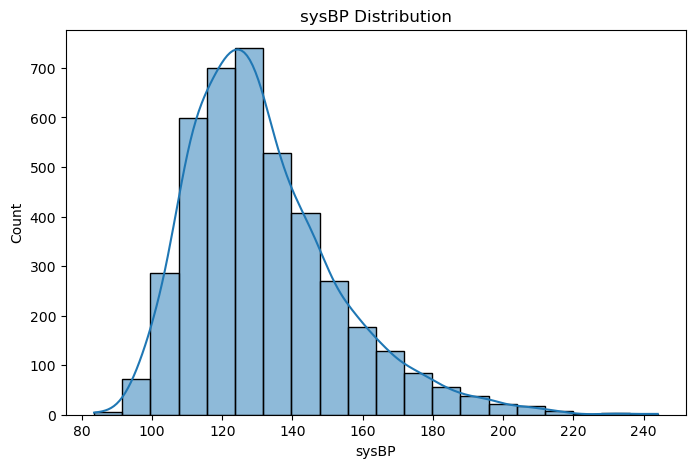

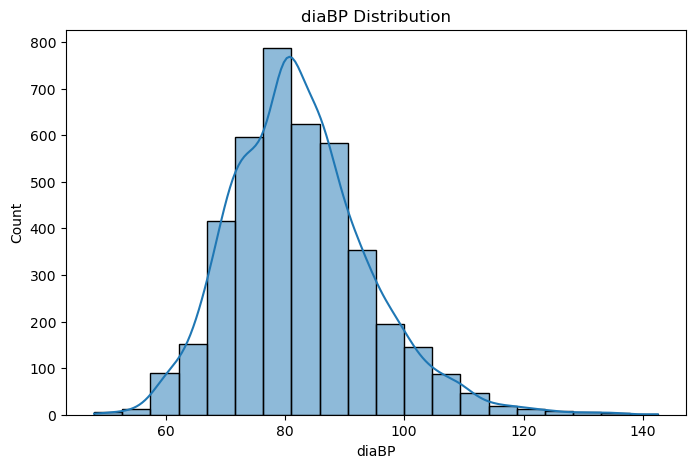

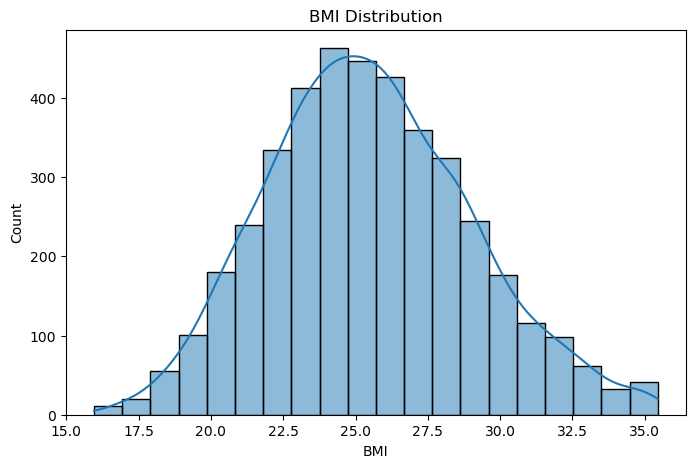

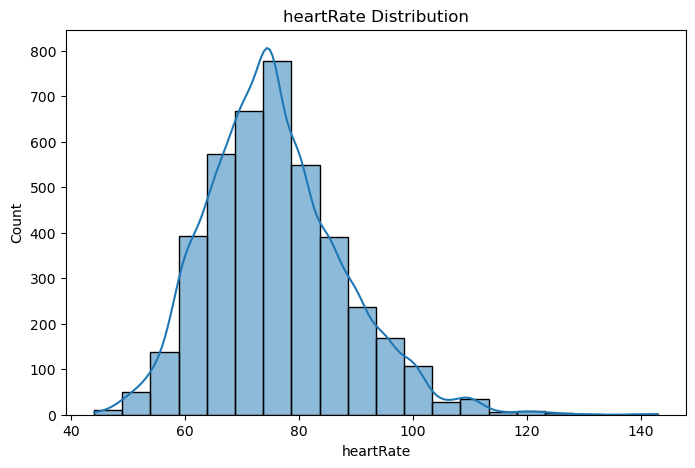

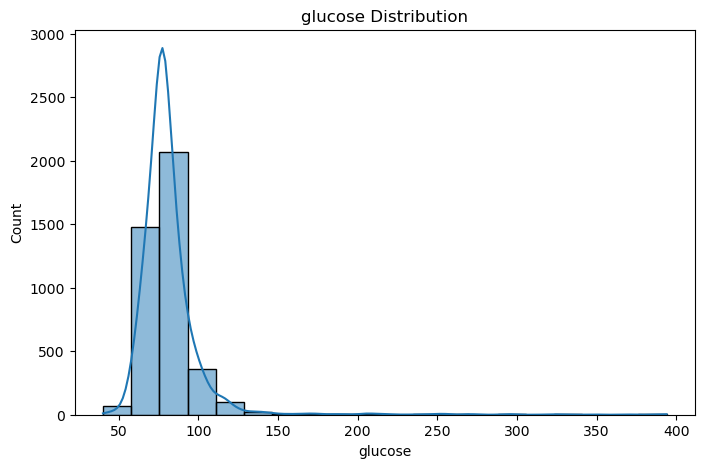

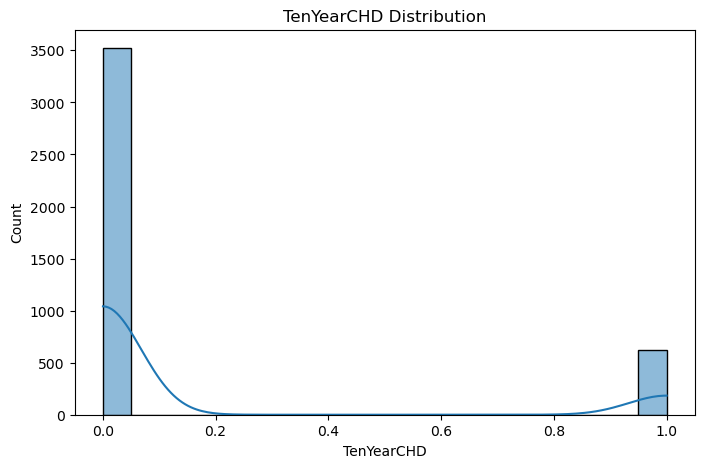

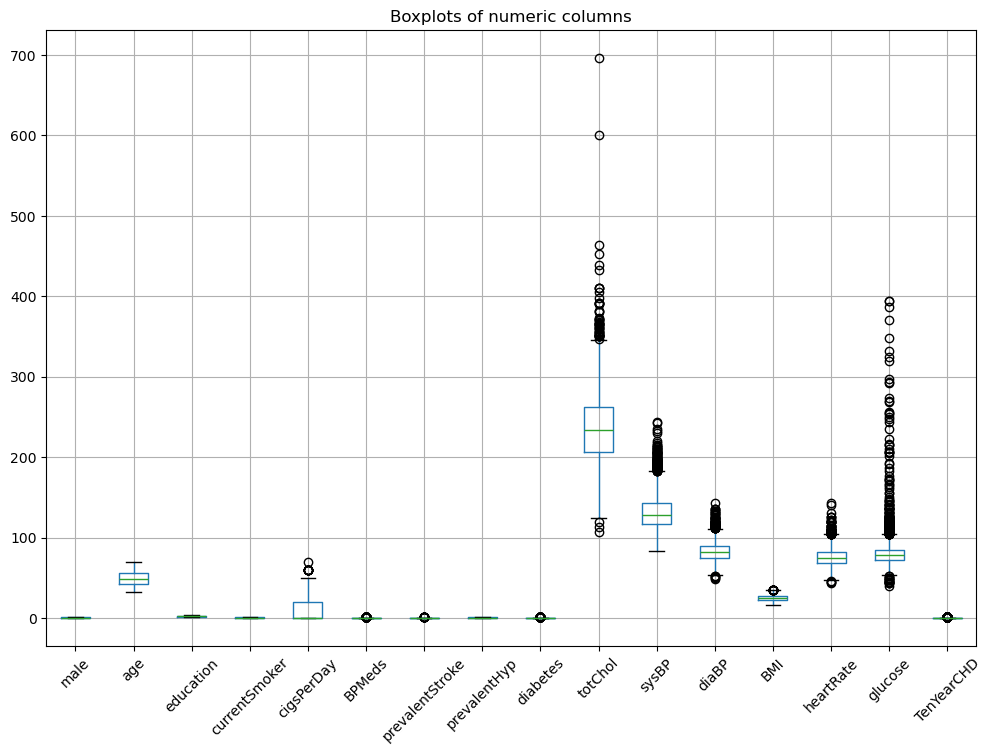

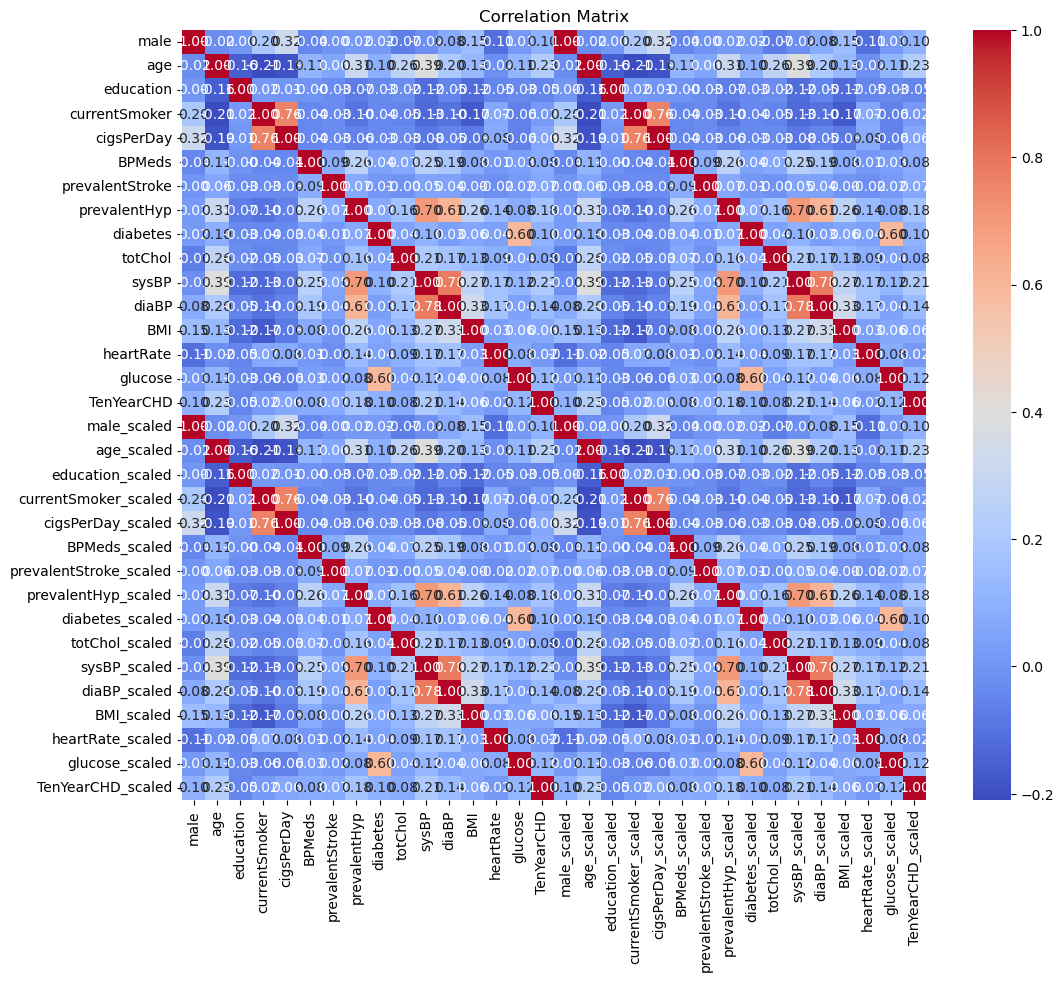

Heart Disease dataset cleaned & saved to ../data/processed/heart_disease_clean.csv


In [1]:
# ==============================================
# 01_data_preparation.ipynb
# AI-Driven Predictive Analytics for Preventive Healthcare
# Sprint 2: Data Preparation
# ==============================================

# 1️⃣ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# ----------------------------------------------
# FUNCTION DEFINITIONS
# ----------------------------------------------

def load_data(path):
    """Load CSV data from given path"""
    df = pd.read_csv(path)
    print(f"Data loaded from {path}. Shape: {df.shape}")
    display(df.head())
    return df

def clean_missing_values(df, categorical_cols=None, numerical_cols=None):
    """Fill missing values: mode for categorical, median for numerical"""
    if categorical_cols:
        for col in categorical_cols:
            if col in df.columns:
                df[col] = df[col].fillna(df[col].mode()[0])
    if numerical_cols:
        for col in numerical_cols:
            if col in df.columns:
                df[col] = df[col].fillna(df[col].median())
    df = df.dropna()  # remove any remaining NaNs
    return df

def scale_features(df, cols):
    """Scale numerical columns using MinMaxScaler"""
    scaler = MinMaxScaler()
    for col in cols:
        df[col + '_scaled'] = scaler.fit_transform(df[[col]])
    return df

def remove_outliers_iqr(df, col):
    """Remove outliers using IQR method for one column"""
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df[(df[col] >= lower) & (df[col] <= upper)]
    return df_clean

def plot_histograms(df, cols):
    for col in cols:
        if col in df.columns:
            plt.figure(figsize=(8,5))
            sns.histplot(df[col], bins=20, kde=True)
            plt.title(f'{col} Distribution')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.show()

def plot_boxplots(df, cols):
    plt.figure(figsize=(12,8))
    df[cols].boxplot()
    plt.xticks(rotation=45)
    plt.title("Boxplots of numeric columns")
    plt.show()

def plot_correlation_matrix(df):
    plt.figure(figsize=(12,10))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

def plot_countplot(df, col):
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(x=col, data=df, palette='Set2')
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

# ----------------------------------------------
# PART A: Diabetes Dataset
# ----------------------------------------------

# 2️⃣ Load raw data
diabetes_path = "../data/raw/diabetes_binary_health_indicators_BRFSS2015.csv"
df_diabetes = load_data(diabetes_path)

# 3️⃣ Cleaning missing values
categorical_cols_diabetes = []  # ingen kategoriske her
numerical_cols_diabetes = [col for col in df_diabetes.columns if df_diabetes[col].dtype in ['int64','float64']]
df_diabetes = clean_missing_values(df_diabetes, categorical_cols_diabetes, numerical_cols_diabetes)

# 4️⃣ Scale features
df_diabetes = scale_features(df_diabetes, ['BMI'] if 'BMI' in df_diabetes.columns else [])

# 5️⃣ EDA - diabetes
plot_histograms(df_diabetes, ['Age', 'BMI'] if 'BMI' in df_diabetes.columns else ['Age'])
plot_boxplots(df_diabetes, numerical_cols_diabetes)
plot_correlation_matrix(df_diabetes)
plot_countplot(df_diabetes, 'Diabetes_binary')

# 6️⃣ Save clean data
processed_path_diabetes = "../data/processed/cdc_diabetes_clean.csv"
df_diabetes.to_csv(processed_path_diabetes, index=False)
print(f"Diabetes dataset cleaned & saved to {processed_path_diabetes}")

# ----------------------------------------------
# PART B: Heart Disease Dataset
# ----------------------------------------------

heart_path = "../data/raw/heart_disease.csv"
df_heart = load_data(heart_path)

# Missing values & cleaning
categorical_cols_heart = ['education', 'sex', 'smoking']  # tilpas efter datasæt
numerical_cols_heart = [col for col in df_heart.select_dtypes(include=['int64','float64']).columns]
df_heart = clean_missing_values(df_heart, categorical_cols_heart, numerical_cols_heart)

# Scale numerical features
df_heart = scale_features(df_heart, numerical_cols_heart)

# Optional: remove outliers from BMI if exists
if 'BMI' in df_heart.columns:
    before = df_heart.shape[0]
    df_heart = remove_outliers_iqr(df_heart, 'BMI')
    after = df_heart.shape[0]
    print(f"\nRemoved {before - after} outliers from BMI")

# EDA - heart dataset
plot_histograms(df_heart, numerical_cols_heart)
plot_boxplots(df_heart, numerical_cols_heart)
plot_correlation_matrix(df_heart)
plot_countplot(df_heart, 'heart_disease')  # tilpas målvariabel

# Save cleaned data
processed_path_heart = "../data/processed/heart_disease_clean.csv"
df_heart.to_csv(processed_path_heart, index=False)
print(f"Heart Disease dataset cleaned & saved to {processed_path_heart}")
